<a href="https://colab.research.google.com/github/osommersell264/MLsessions/blob/main/SommersellI_Grad%20Prediction%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your Task: Predict Student Success

The purpose of this HW is to get you hands on with real data trying out the modelling techniques we talked about.

You are free to use gen-ai with this project to help with the coding (of course, you don't have to!). [Hands on Machine Learning](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/) is also a great resource.

Your code needs to run, but I want you to focus less on the specifics of the code and more on understanding the component steps that go into building and validating a model. Creating code is now pretty easy, creating a "good" model is hard.

For this exercise we will use open data on student dropout from Portugal. Full documentation is available [here](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

M.V.Martins, D. Tolledo, J. Machado, L. M.T. Baptista, V.Realinho. (2021) "Early prediction of student’s performance in higher education: a case study" Trends and Applications in Information Systems and Technologies, vol.1, in Advances in Intelligent Systems and Computing series. Springer. DOI: 10.1007/978-3-030-72657-7_16

You will turn in on the class website a google slide deck that has:
1. A cover slide contianing your name (and all group member names if working together) and a link to your colab (**Create slide 1 now**)
2. 3 slides answering the questions below - they are clearly indicated as you go through the colab notebook.


# Get the data

Here I provide some code to get the data for you

In [22]:
!pip install ucimlrepo scikit-learn pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# metadata
print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(predict_students_dropout_and_academic_success.variables)

{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

# 1 Data Checking

- Look at your outcome variable - any cases to exclude?
- Determine the base-rate accuracy for a naive model
- Create Test and Training Sets
- Look at distributions of x variables, look up meta data, decide which to include

At the end of this section you should have
`x_train`, `x_text`, `y_train`, `y_test`
And an estimate of the base rate accuracy.

In [24]:
# Load the Dataset
dataset = fetch_ucirepo(id=697)
X = dataset.data.features
y = dataset.data.targets

In [25]:
# Data Checking
# Check for missing or invalid values in y
print("Target Variable Distribution:\n", y.value_counts())

Target Variable Distribution:
 Target  
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [26]:
# Remove "Enrolled" students
X = X[y != "Enrolled"]
y = y[y != "Enrolled"]


In [27]:
# Convert the 'Target' column of the DataFrame 'y' to a Series
y_series = y['Target']


In [28]:
# Convert target variable to binary: 1 = Graduate, 0 = Dropout
y_series = y_series.map({"Graduate": 1, "Dropout": 0})

In [29]:
# Convert target variable to binary: 1 = Graduate, 0 = Dropout
y_series = y_series.map({"Graduate": 1, "Dropout": 0})

In [30]:
#Explore the Data

print("Dataset Overview:\n", predict_students_dropout_and_academic_success.metadata)
print("Feature Information:\n", predict_students_dropout_and_academic_success.variables)
print("First few rows:\n", X.head())

Dataset Overview:
 {'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.",

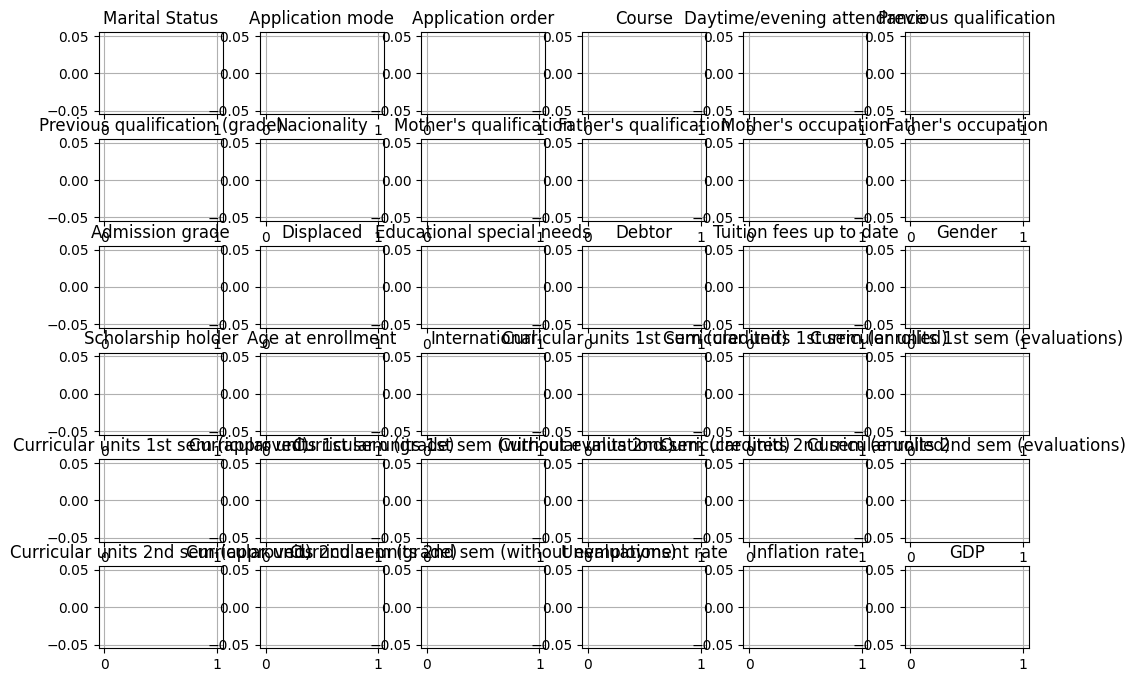

In [31]:
# Visualizing feature distributions
X.hist(figsize=(12, 8), bins=20)
plt.show()

In [32]:
#Preprocessing
# Encode categorical variables
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

In [33]:
# Encode the target variable
y = LabelEncoder().fit_transform(y)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


# 2 Train a Model
* Pick one of the models we discussed today and train it.
* Report its accuracy and print a confusion matrix.
   * How much better is your model than the base rate?
   * How does accuracy on the train set compare to accuracy on the test set?
   * **Report Slide 2: Include an image of the confusion matrix, the base rate accuracy, train-set accuracy and test-set accuracy**

In [35]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [36]:
# Train and Compare Machine Learning Models

# Model 1: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {rf_accuracy:.2f}")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.47
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       316
           1       0.47      1.00      0.64       418
           2       0.00      0.00      0.00       151

    accuracy                           0.47       885
   macro avg       0.16      0.33      0.21       885
weighted avg       0.22      0.47      0.30       885



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 3 Train a Different Model
* Repeat all the steps in 2, but use a different model
* In addition, compare the accuracy of 1 and 2
* **Report Slide 3: Model 2 confusion matrix, train-set accuracy and test-set accuracy. Comparison Model 1 and Model 2 accuracy**

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Model Accuracy: {lr_accuracy:.2f}")
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

In [ ]:
#Model Evaluation
print("Confusion Matrix - Random Forest:\n", confusion_matrix(y_test, y_pred_rf))
print("Confusion Matrix - Logistic Regression:\n", confusion_matrix(y_test, y_pred_lr))

In [ ]:
#Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')
plt.show()

# 4 Reflection
* **Type responses on Slide 4**
* Contextualizing accuracy - think about different use cases for your model, which ones would you feel its accurate enough to use for? I only asked you to look at overall accuracy, is that good enough?
* Contextualizing features - think about these same use cases, are the prediction features you included appropriate for these uses?
* Generalizability - again thinking about your features, could you use this model in other educational contexts? How hard would it be to get that same data? Are there issues with it generalizing over time and location?

# 5 Extra Credit
* Consider ensembling your two models. Does that perform better?
* Check accuracy for different subgroups